In [3]:
import os

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
tracksummary = uproot.open("root/tracksummary_gsf.root:tracksummary")
trackstates = uproot.open("root/trackstates_gsf.root:trackstates")

In [5]:
print(tracksummary.keys())

['event_nr', 'multiTraj_nr', 'subTraj_nr', 'nStates', 'nMeasurements', 'nOutliers', 'nHoles', 'nSharedHits', 'chi2Sum', 'NDF', 'measurementChi2', 'outlierChi2', 'measurementVolume', 'measurementLayer', 'outlierVolume', 'outlierLayer', 'nMajorityHits', 'majorityParticleId', 't_charge', 't_time', 't_vx', 't_vy', 't_vz', 't_px', 't_py', 't_pz', 't_theta', 't_phi', 't_eta', 't_p', 't_pT', 't_d0', 't_z0', 'hasFittedParams', 'eLOC0_fit', 'eLOC1_fit', 'ePHI_fit', 'eTHETA_fit', 'eQOP_fit', 'eT_fit', 'err_eLOC0_fit', 'err_eLOC1_fit', 'err_ePHI_fit', 'err_eTHETA_fit', 'err_eQOP_fit', 'err_eT_fit', 'res_eLOC0_fit', 'res_eLOC1_fit', 'res_ePHI_fit', 'res_eTHETA_fit', 'res_eQOP_fit', 'res_eT_fit', 'pull_eLOC0_fit', 'pull_eLOC1_fit', 'pull_ePHI_fit', 'pull_eTHETA_fit', 'pull_eQOP_fit', 'pull_eT_fit']


In [6]:
print(trackstates.keys())

['event_nr', 'multiTraj_nr', 'subTraj_nr', 't_x', 't_y', 't_z', 't_r', 't_dx', 't_dy', 't_dz', 't_eLOC0', 't_eLOC1', 't_ePHI', 't_eTHETA', 't_eQOP', 't_eT', 'nStates', 'nMeasurements', 'volume_id', 'layer_id', 'module_id', 'pathLength', 'l_x_hit', 'l_y_hit', 'g_x_hit', 'g_y_hit', 'g_z_hit', 'res_x_hit', 'res_y_hit', 'err_x_hit', 'err_y_hit', 'pull_x_hit', 'pull_y_hit', 'dim_hit', 'nPredicted', 'predicted', 'eLOC0_prt', 'eLOC1_prt', 'ePHI_prt', 'eTHETA_prt', 'eQOP_prt', 'eT_prt', 'res_eLOC0_prt', 'res_eLOC1_prt', 'res_ePHI_prt', 'res_eTHETA_prt', 'res_eQOP_prt', 'res_eT_prt', 'err_eLOC0_prt', 'err_eLOC1_prt', 'err_ePHI_prt', 'err_eTHETA_prt', 'err_eQOP_prt', 'err_eT_prt', 'pull_eLOC0_prt', 'pull_eLOC1_prt', 'pull_ePHI_prt', 'pull_eTHETA_prt', 'pull_eQOP_prt', 'pull_eT_prt', 'g_x_prt', 'g_y_prt', 'g_z_prt', 'px_prt', 'py_prt', 'pz_prt', 'eta_prt', 'pT_prt', 'nFiltered', 'filtered', 'eLOC0_flt', 'eLOC1_flt', 'ePHI_flt', 'eTHETA_flt', 'eQOP_flt', 'eT_flt', 'res_eLOC0_flt', 'res_eLOC1_flt',

In [8]:
print(len(trackstates["multiTraj_nr"].array()))

19849


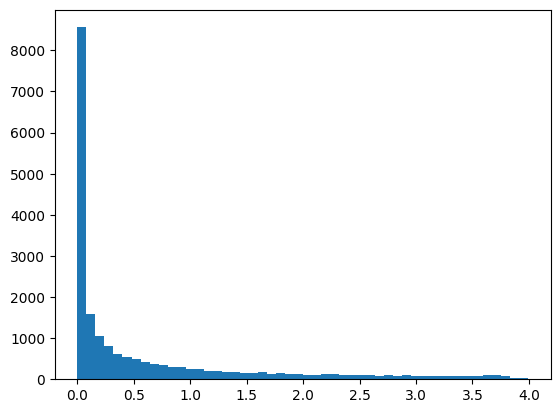

In [7]:
_ = plt.hist([ abs(abs(1/e[0])-abs(1/e[-1])) for e in trackstates["t_eQOP"].array(library="np")], bins=50)

In [16]:
def get(keys):
    return [ trackstates[key].array(library="np") for key in keys ]

Text(0.5, 1.0, 'x of first hit')

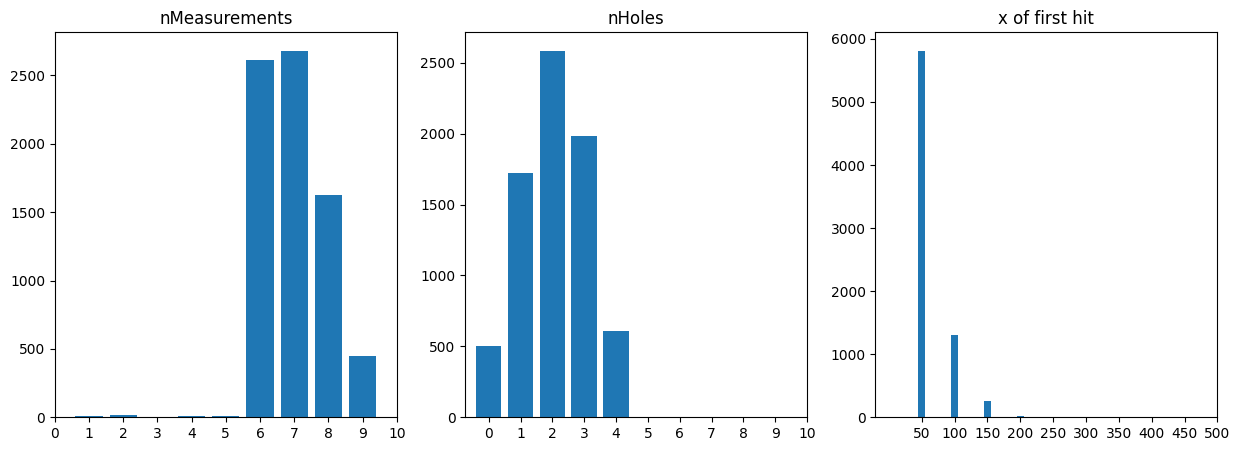

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].bar(*np.unique(trackstates["nMeasurements"].array(library="np"), return_counts=True))
ax[0].set_title("nMeasurements")
ax[0].set_xticks(np.linspace(0,10,11))

ax[1].bar(*np.unique(trackstates["nStates"].array(library="np") - trackstates["nMeasurements"].array(library="np"), return_counts=True))
ax[1].set_title("nHoles")
ax[1].set_xticks(np.linspace(0,10,11))

ax[2].bar(*np.unique([ float(min(track)) for track in get(["t_x"])[0] ],return_counts=True), width=10)
ax[2].set_xticks(np.linspace(50,500,10))
ax[2].set_title("x of first hit")

In [18]:
def plot_at_track_position(pos):
    end_energies_true = []
    end_energies_flt = []
    end_energies_prt = []
    x_positions_true = []
    x_positions_flt = []
    x_positions_prt = []

    for true_x, flt_x, prt_x, true_qop, flt_qop, prt_qop in zip(*get(["t_x", "g_x_flt", "g_x_prt", "t_eQOP", "eQOP_flt", "eQOP_prt"])):
        if abs(true_x[pos] - flt_x[pos]) > 1 or abs(true_x[pos] - prt_x[pos]) > 1:
            print("mismatch",true_x[pos],flt_x[pos],prt_x[pos])
            
        #if abs(true_x[pos] - 450) > 1:
        #    continue
            
        end_energies_true.append(abs(1/true_qop[pos]))
        end_energies_flt.append(abs(1/flt_qop[pos]))
        end_energies_prt.append(abs(1/prt_qop[pos]))
        
        x_positions_true.append(true_x[pos])
        x_positions_flt.append(flt_x[pos])
        x_positions_prt.append(prt_x[pos])
        
        
    print("prt (fwd): ",np.mean(end_energies_prt), np.std(end_energies_prt))
    print("flt (bwd): ",np.mean(end_energies_flt), np.std(end_energies_flt))
    print("true:",np.mean(end_energies_true), np.std(end_energies_true))
    
    fig, ax = plt.subplots(1,5, figsize=(14,5))
    
    _, bins, _ = ax[0].hist(end_energies_prt, bins=200, alpha=0.5, label="GSF prt/fwd")
    _ = ax[0].hist(end_energies_true, bins=bins, alpha=0.5,label="true geant")
    ax[0].set_title("prt (fwd) energy")
    ax[0].set_yscale('log')
    
    _, bins, _ = ax[1].hist(end_energies_flt, bins=200, alpha=0.5, label="GSF flt/bwd")
    _ = ax[1].hist(end_energies_true, bins=bins, alpha=0.5,label="true geant")
    ax[1].set_title("flt (bwd) energy")
    ax[1].set_yscale('log')
    
    ratio = np.array(end_energies_prt) / np.array(end_energies_true)
    ratio = np.clip(ratio, 0, 2)
    _ = ax[2].hist(ratio, bins=100)
    ax[2].set_title("prt / true")
    
    ratio = np.array(end_energies_flt) / np.array(end_energies_true)
    ratio = np.clip(ratio, 0, 2)
    _ = ax[3].hist(ratio, bins=100)
    ax[3].set_title("flt / true")
    
    ax[4].bar(*np.unique(x_positions_flt, return_counts=True), width=20, alpha=0.3, label="x_flt")
    ax[4].bar(*np.unique(x_positions_prt, return_counts=True), width=20, alpha=0.3, label="x_flt")
    ax[4].bar(*np.unique(x_positions_true, return_counts=True), width=20, alpha=0.3, label="true")
    ax[4].set_title("x position")
    
    fig.legend()

prt (fwd):  3.4422992273404374 0.8924345135030352
flt (bwd):  3.4422992273404374 0.8924345135030352
true: 3.4612067893365768 0.8988399597535723


Text(0.5, 0.98, 'At the last measurement surface')

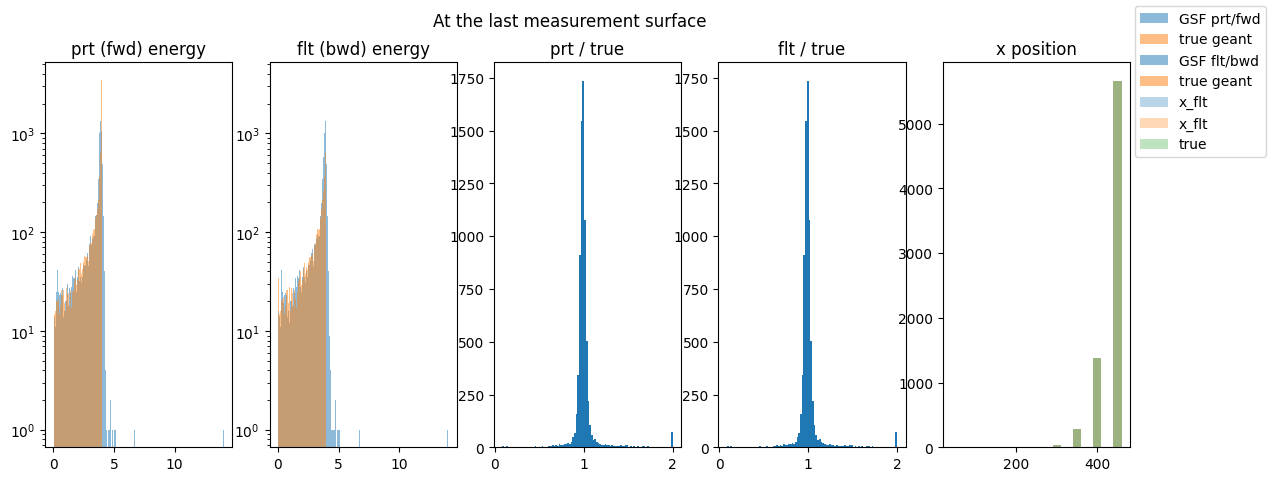

In [19]:
plot_at_track_position(0)
plt.suptitle("At the last measurement surface")

prt (fwd):  3.8657251971498945 0.3131885167412909
flt (bwd):  3.9455536658929575 0.936382488393302
true: 3.88259661639243 0.46257992417763966


Text(0.5, 0.98, 'At the first measurement surface')

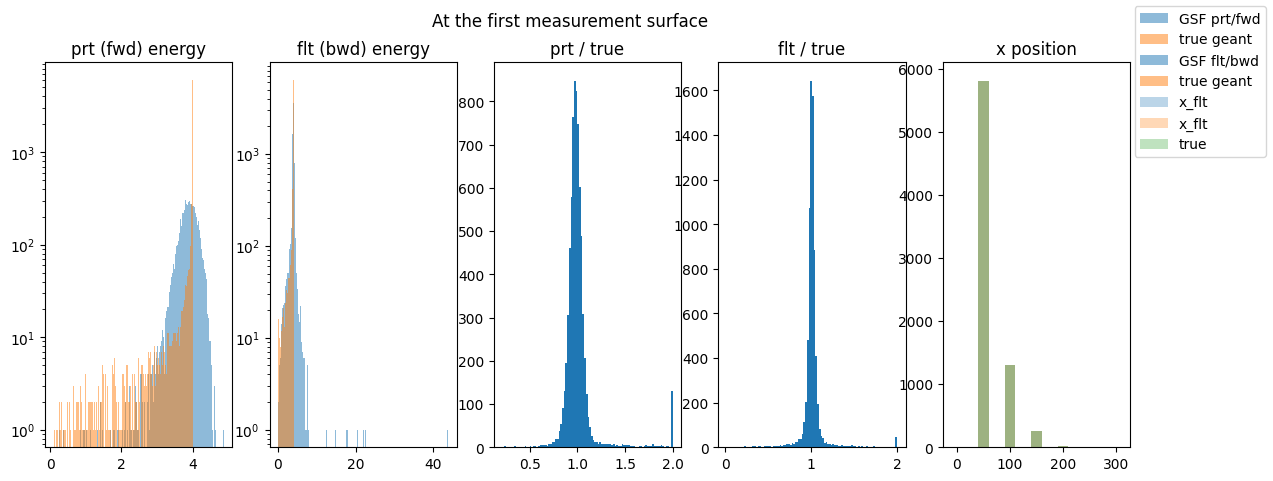

In [20]:
plot_at_track_position(-1)
plt.suptitle("At the first measurement surface")

Text(0.5, 1.0, 'Backward (filtered) p/p_true')

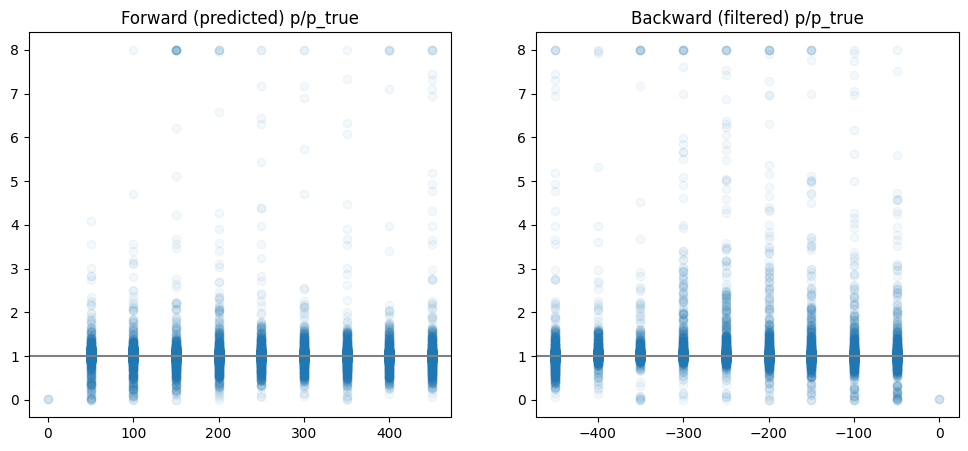

In [21]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

xs = []
ratios_flt = []
ratios_prt = []

for track_true_x, track_true_qop, track_prt_qop, track_flt_qop in zip(*get(["t_x", "t_eQOP", "eQOP_prt", "eQOP_flt"])):
    for x, t_qop, prt_qop, flt_qop in zip(track_true_x, track_true_qop, track_prt_qop, track_flt_qop):
        xs.append(x)
        ratios_flt.append(np.clip(float(flt_qop/t_qop), 0, 8))
        ratios_prt.append(np.clip(float(prt_qop/t_qop), 0, 8))
        
ax[0].axhline(y = 1, color = 'grey', linestyle = '-')
ax[0].scatter(xs, ratios_prt, alpha=0.05)
#ax[0].set_yscale('log')
ax[0].set_title("Forward (predicted) p/p_true")
ax[1].axhline(y = 1, color = 'grey', linestyle = '-')
ax[1].scatter(-1 * np.array(xs), ratios_flt, alpha=0.05)
#ax[1].set_yscale('log')
ax[1].set_title("Backward (filtered) p/p_true")

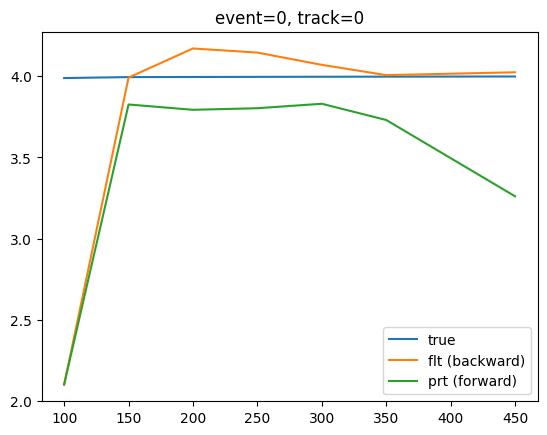

In [22]:
i=0
for true_x, flt_x, true_qop, flt_qop, prt_qop, event, track in zip(*get(["t_x", "g_x_flt", "t_eQOP", "eQOP_flt", "eQOP_prt", 'event_nr', 'multiTraj_nr'])):
    true_p = np.flip(1./abs(true_qop))
    flt_p = np.flip(1./abs(flt_qop))
    prt_p = np.flip(1./abs(prt_qop))
    
    i+=1
    #if i == 4653:
    if abs(true_p[-1] - flt_p[-1]) > 1: # and (1/abs(true_qop[-1] - 4.0) < 0.01):
        plt.plot(true_x, true_p, label="true")
        plt.plot(flt_x, flt_p, label="flt (backward)")
        plt.plot(flt_x, prt_p, label="prt (forward)")
        plt.title("event={}, track={}".format(event, track))
        break
        
plt.legend()
plt.show()

In [31]:
print_good = False
n_good = 0
print_bad = False
n_bad = 0
a = 0
for true_x, flt_x, true_qop, flt_qop, e, t in zip(*get(["t_x", "g_x_flt", "t_eQOP", "eQOP_flt", "event_nr", "multiTraj_nr"])):
    a+=1
    if abs(abs(1/flt_qop[0])/abs(1/true_qop[0]) - 1.0) < 0.05:
        if not print_good:
            print("Good track:",e,t,"true:",abs(1/true_qop[0]),"flt:",abs(1/flt_qop[0]),"r",abs(1/flt_qop[0])/abs(1/true_qop[0]))
            print_good = True
        n_good += 1
        
    if abs(1/flt_qop[0])/abs(1/true_qop[0]) > 1.3:
        if not print_bad:
            print("Bad track:",e,t,"true:",abs(1/true_qop[0]),"flt:",abs(1/flt_qop[0]),"r",abs(1/flt_qop[0])/abs(1/true_qop[0]))
            #print_bad = True
        n_bad += 1
        
print("Good tracks:",n_good,100*n_good/a)
print("Bad tracks:",n_bad,100*n_bad/a)

Good track: 0 1 true: 3.888452878291856 flt: 3.8896383519849027 r 1.0003048702736415
Bad track: 0 41 true: 0.11412336750655087 flt: 3.534528200703505 r 30.971117291124596
Bad track: 0 68 true: 0.4634586982594266 flt: 1.5931289991514563 r 3.4374778273331343
Bad track: 0 122 true: 1.7659459646649045 flt: 3.807836661639019 r 2.1562588764495816
Bad track: 0 133 true: 1.617079501610119 flt: 3.539540357244878 r 2.188847458471011
Bad track: 0 212 true: 0.3936366499650689 flt: 1.3915949312323566 r 3.5352270459466766
Bad track: 0 354 true: 0.4693564039117808 flt: 0.6640591751950552 r 1.4148292633498836
Bad track: 0 362 true: 2.5997294159229942 flt: 3.9502822283383012 r 1.5194974539055304
Bad track: 0 427 true: 1.9669280840699985 flt: 3.260951584229264 r 1.6578906014101196
Bad track: 0 441 true: 1.818997891108514 flt: 2.993177438080409 r 1.645509020494982
Bad track: 0 449 true: 1.0899952046545711 flt: 1.4288052873546186 r 1.310836305750005
Bad track: 0 522 true: 1.7446097638864293 flt: 3.1719782